In [1]:
import sys
import importlib
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"../")
import mplhep as hep
import pickle
import glob
import ROOT
import coffea
import awkward as ak
from coffea import processor
from coffea.nanoevents.methods import vector
import dask_awkward as dak
import hist

Welcome to JupyROOT 6.30/07


/cvmfs/cms.cern.ch/el9_amd64_gcc12/lcg/root/6.30.07-024df6516c17fd2edef848a927a788f1/lib/ROOT/_facade.py:154: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  return _orig_ihook(name, *args, **kwds)
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, w

In [2]:
sys.path.insert(0,"../python/HNL_Plotting_HelperFunctions")
import MuonSystemReader
import HNL_Processor
import Processing_Helpers


In [3]:
sensitivity_hists = ["CSC_Cluster_Size", "CSC_Cluster_Eta", "CSC_Cluster_JetVetoPt", "CSC_Cluster_MuonVetoPt", "CSC_Cluster_PuppiMetDPhi",
                    "tau_pt", "tau_eta", "tau_phi", "PUPPI_MET"]
#sensitivity_hists = ["CSC_Cluster_JetVetoPt"]

In [4]:
HNL_2GeV_10ctau_path = "root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/signal_displacedHNL/HNL_tau_mN_2_ctau_1000/normalized/HNL_tau_mN_2_ctau_1000.root"
signal_events  = MuonSystemReader.loadTree_nanoFactory(HNL_2GeV_10ctau_path)

In [5]:
importlib.reload(MuonSystemReader)
importlib.reload(HNL_Processor)
importlib.reload(Processing_Helpers)

<module 'Processing_Helpers' from '/uscms_data/d3/amalbert/el9_work/CMSSW_14_1_0_pre4/src/run3_llp_analyzer/HNL_Plotting_Scripts/../python/HNL_Plotting_HelperFunctions/Processing_Helpers.py'>

In [19]:
output_data = Processing_Helpers.processData("root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/2024_Data_noEtaCut/", sensitivity_hists, tau_cluster_topo_hists=False)

root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/2024_Data_noEtaCut/Muon0-Run2024B-PromptReco-v1/normalized/Muon0-Run2024B-PromptReco-v1_goodLumi.root
['CSC_Cluster_Size', 'CSC_Cluster_Eta', 'CSC_Cluster_JetVetoPt', 'CSC_Cluster_MuonVetoPt', 'CSC_Cluster_PuppiMetDPhi', 'tau_pt', 'tau_eta', 'tau_phi', 'PUPPI_MET']
Generated Masks, Starting to Fill Event-Level Histograms
filling reco taus hists
CSC_Cluster_Size
Inverting Tau LooseID in data for cluster size
CSC_Cluster_Eta
CSC_Cluster_MuonVetoPt
CSC_Cluster_JetVetoPt
CSC_Cluster_PuppiMetDPhi
root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/2024_Data_noEtaCut/Muon0-Run2024C-PromptReco-v1/normalized/Muon0-Run2024C-PromptReco-v1_goodLumi.root
['CSC_Cluster_Size', 'CSC_Cluster_Eta', 'CSC_Cluster_JetVetoPt', 'CSC_Cluster_MuonVetoPt', 'CSC_Cluster_PuppiMetDPhi', 'tau_pt', 'tau_eta', 'tau_phi', 'PUPPI_MET']
Generated Masks, Starting to Fill Event-Level Histograms
filling reco taus hists
CSC_Cluste

In [20]:
processor = HNL_Processor.HNL_Processor(isMC=True, applyGenInfo=False)
output = processor.process(signal_events, hists_to_process = sensitivity_hists, tau_cluster_topo_hists=False)

['CSC_Cluster_Size', 'CSC_Cluster_Eta', 'CSC_Cluster_JetVetoPt', 'CSC_Cluster_MuonVetoPt', 'CSC_Cluster_PuppiMetDPhi', 'tau_pt', 'tau_eta', 'tau_phi', 'PUPPI_MET']
Generated Masks, Starting to Fill Event-Level Histograms
filling reco taus hists
CSC_Cluster_Size
CSC_Cluster_Eta
CSC_Cluster_MuonVetoPt
CSC_Cluster_JetVetoPt
CSC_Cluster_PuppiMetDPhi


In [21]:
output.keys()

dict_keys(['PUPPI_MET', 'tau_pt', 'tau_eta', 'tau_phi', 'CSC_Cluster_Size', 'CSC_Cluster_Eta', 'CSC_Cluster_MuonVetoPt', 'CSC_Cluster_JetVetoPt', 'CSC_Cluster_PuppiMetDPhi'])

### Tau Kinematics

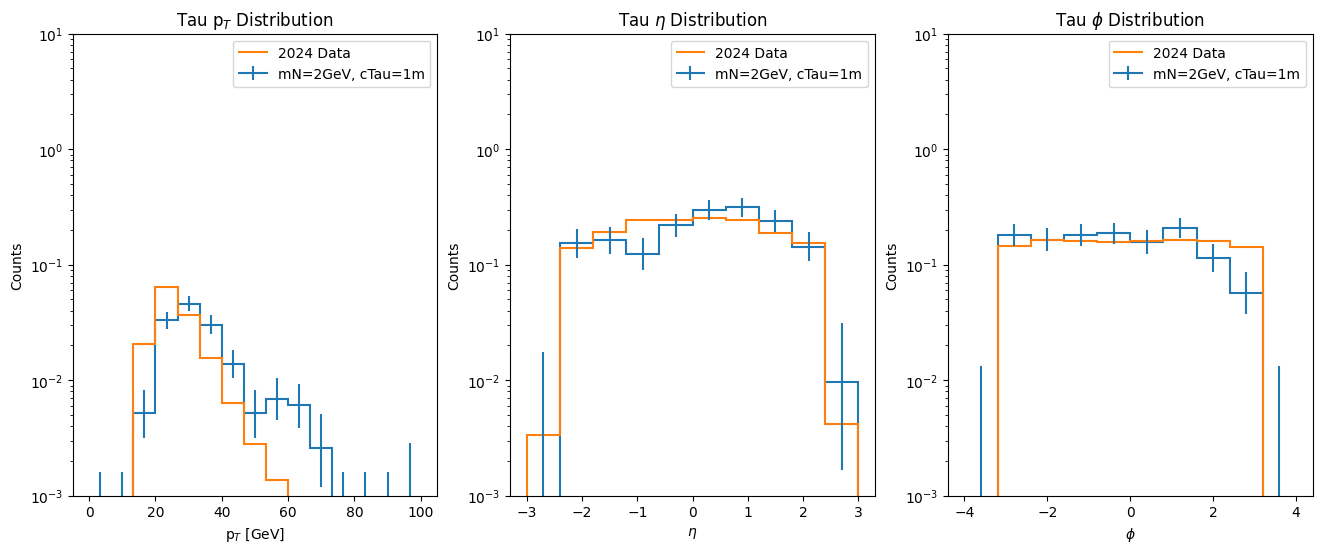

In [22]:
fig, axs = plt.subplots(1,3, figsize=(16,6))
signal_label = "mN=2GeV, cTau=1m"
data_label = "2024 Data"

#pT
h_pT = output["tau_pt"]
h_pT_data = output_data["tau_pt"]
h_pT.plot(ax=axs[0], label=signal_label, density=True)
h_pT_data.plot(ax=axs[0], label=data_label, density=True)
axs[0].set_title(h_pT.metadata["title"])
axs[0].set_ylabel(h_pT.metadata["y_label"])
axs[0].legend()
axs[0].set_yscale('log')
axs[0].set_ylim(1e-3, 10)

#eta
h_eta = output["tau_eta"]
h_eta_data = output_data["tau_eta"]
h_eta.plot(ax=axs[1], label=signal_label, density=True)
h_eta_data.plot(ax=axs[1], label=data_label, density=True)
axs[1].set_title(h_eta.metadata["title"])
axs[1].set_ylabel(h_eta.metadata["y_label"])
axs[1].legend()
axs[1].set_yscale('log')
axs[1].set_ylim(1e-3, 10)

#phi
h_phi = output["tau_phi"]
h_phi_data = output_data["tau_phi"]
h_phi.plot(ax=axs[2], label=signal_label, density=True)
h_phi_data.plot(ax=axs[2], label=data_label, density=True)
axs[2].set_title(h_phi.metadata["title"])
axs[2].set_ylabel(h_phi.metadata["y_label"])
axs[2].legend()
axs[2].set_yscale('log')
axs[2].set_ylim(1e-3, 10)


plt.show()

### CSC Cluster Plots

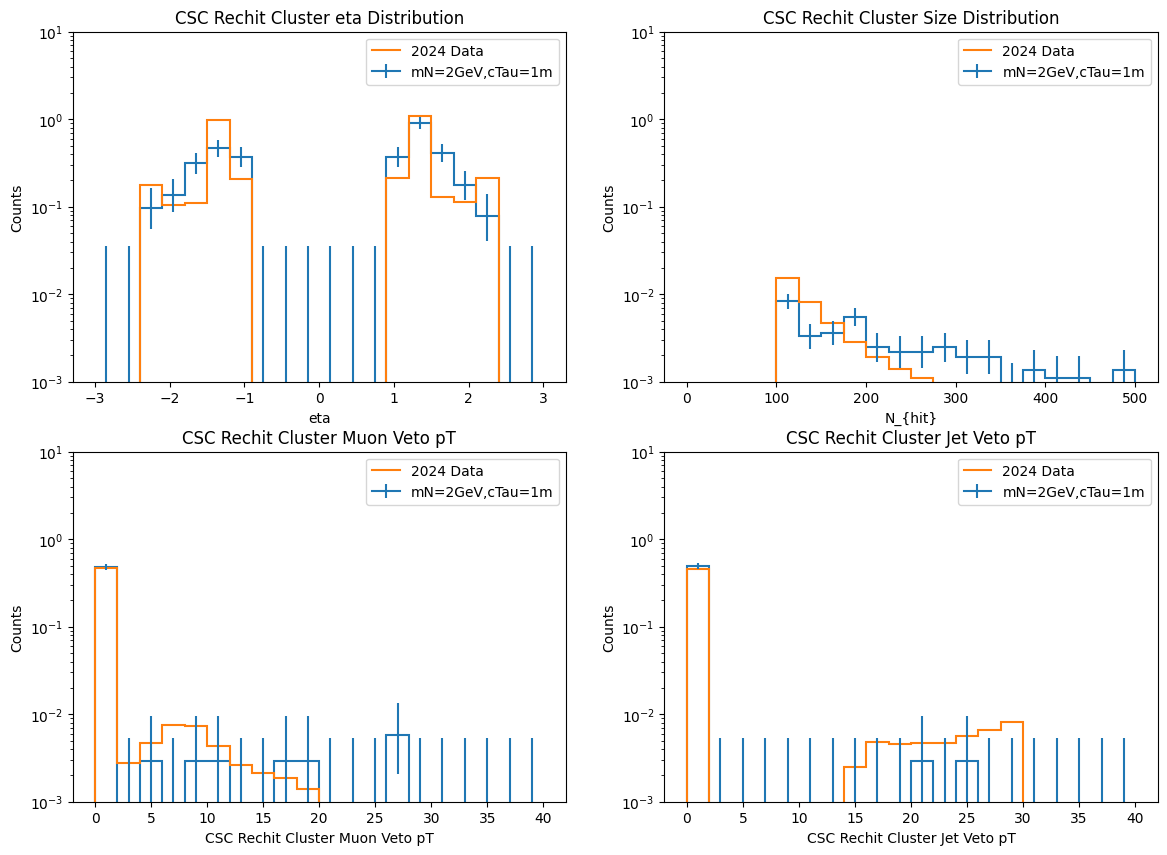

In [23]:
fig, axs = plt.subplots(2,2, figsize=(14,10))
signal_label = "mN=2GeV,cTau=1m"
data_label = "2024 Data"

#eta
h_pT = output["CSC_Cluster_Eta"]
h_pT_data = output_data["CSC_Cluster_Eta"]
h_pT.plot(ax=axs[0,0], label=signal_label, density=True)
h_pT_data.plot(ax=axs[0,0], label=data_label, density=True)
axs[0,0].set_title(h_pT.metadata["title"])
axs[0,0].set_ylabel(h_pT.metadata["y_label"])
axs[0,0].legend()
axs[0,0].set_yscale('log')
axs[0,0].set_ylim(1e-3, 10)

#size
h_eta = output["CSC_Cluster_Size"]
h_eta_data = output_data["CSC_Cluster_Size"]
h_eta.plot(ax=axs[0,1], label=signal_label, density=True)
h_eta_data.plot(ax=axs[0,1], label=data_label, density=True)
axs[0,1].set_title(h_eta.metadata["title"])
axs[0,1].set_ylabel(h_eta.metadata["y_label"])
axs[0,1].legend()
axs[0,1].set_yscale('log')
axs[0,1].set_ylim(1e-3, 10)

#muon veto pt
h_phi = output["CSC_Cluster_MuonVetoPt"]
h_phi_data = output_data["CSC_Cluster_MuonVetoPt"]
h_phi.plot(ax=axs[1,0], label=signal_label, density=True)
h_phi_data.plot(ax=axs[1,0], label=data_label, density=True)
axs[1,0].set_yscale('log')
axs[1,0].set_title(h_phi.metadata["title"])
axs[1,0].set_ylabel(h_phi.metadata["y_label"])
axs[1,0].legend()
axs[1,0].set_ylim(1e-3, 10)

#jet veto pt
h_phi = output["CSC_Cluster_JetVetoPt"]
h_phi_data = output_data["CSC_Cluster_JetVetoPt"]
h_phi.plot(ax=axs[1,1], label=signal_label, density=True)
h_phi_data.plot(ax=axs[1,1], label=data_label, density=True)
axs[1,1].set_yscale('log')
axs[1,1].set_title(h_phi.metadata["title"])
axs[1,1].set_ylabel(h_phi.metadata["y_label"])
axs[1,1].legend()
axs[1,1].set_ylim(1e-3, 10)


plt.show()

### MET-Related

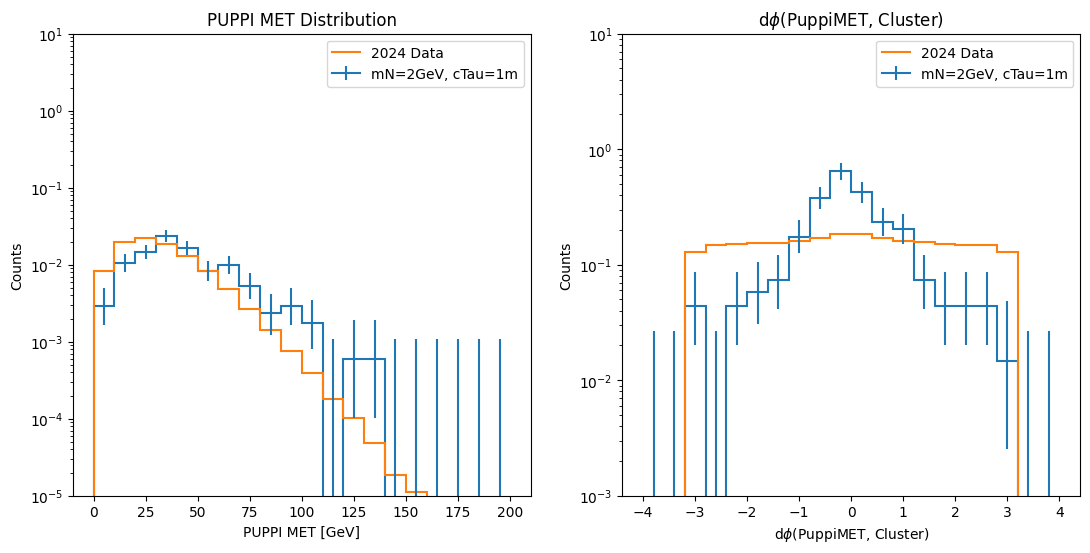

In [25]:
fig, axs = plt.subplots(1,2, figsize=(13,6))
signal_label = "mN=2GeV, cTau=1m"
data_label = "2024 Data"

#MET
h_pT = output["PUPPI_MET"]
h_pT_data = output_data["PUPPI_MET"]
h_pT.plot(ax=axs[0], label=signal_label, density=True)
h_pT_data.plot(ax=axs[0], label=data_label, density=True)
axs[0].set_title(h_pT.metadata["title"])
axs[0].set_ylabel(h_pT.metadata["y_label"])
axs[0].legend()
axs[0].set_yscale('log')
axs[0].set_ylim(1e-5, 10)

#dPhi(MET, cluster)
h_eta = output["CSC_Cluster_PuppiMetDPhi"]
h_eta_data = output_data["CSC_Cluster_PuppiMetDPhi"]
h_eta.plot(ax=axs[1], label=signal_label, density=True)
h_eta_data.plot(ax=axs[1], label=data_label, density=True)
axs[1].set_title(h_eta.metadata["title"])
axs[1].set_ylabel(h_eta.metadata["y_label"])
axs[1].legend()
axs[1].set_yscale('log')
axs[1].set_ylim(1e-3, 10)

plt.show()

### Topology Variables

In [12]:
output_data = Processing_Helpers.processData("root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/2024_Data_noEtaCut/", [], tau_cluster_topo_hists=True)

root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/2024_Data_noEtaCut/Muon0-Run2024B-PromptReco-v1/normalized/Muon0-Run2024B-PromptReco-v1_goodLumi.root
[]
Generated Masks, Starting to Fill Event-Level Histograms
filling reco taus hists
filling topo hists
about to run cartesian for eta
about to run cartesian for phi
root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/2024_Data_noEtaCut/Muon0-Run2024C-PromptReco-v1/normalized/Muon0-Run2024C-PromptReco-v1_goodLumi.root
[]
Generated Masks, Starting to Fill Event-Level Histograms
filling reco taus hists
filling topo hists
about to run cartesian for eta
about to run cartesian for phi
root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/2024_Data_noEtaCut/Muon0-Run2024D-PromptReco-v1/normalized/Muon0-Run2024D-PromptReco-v1_goodLumi.root
[]
Generated Masks, Starting to Fill Event-Level Histograms
filling reco taus hists
filling topo hists
about to run cartesian for eta
about to ru

In [13]:
processor = HNL_Processor.HNL_Processor(isMC=True, applyGenInfo=False)
output = processor.process(signal_events, hists_to_process = [], tau_cluster_topo_hists=True)

[]
Generated Masks, Starting to Fill Event-Level Histograms
filling reco taus hists
filling topo hists
about to run cartesian for eta
about to run cartesian for phi


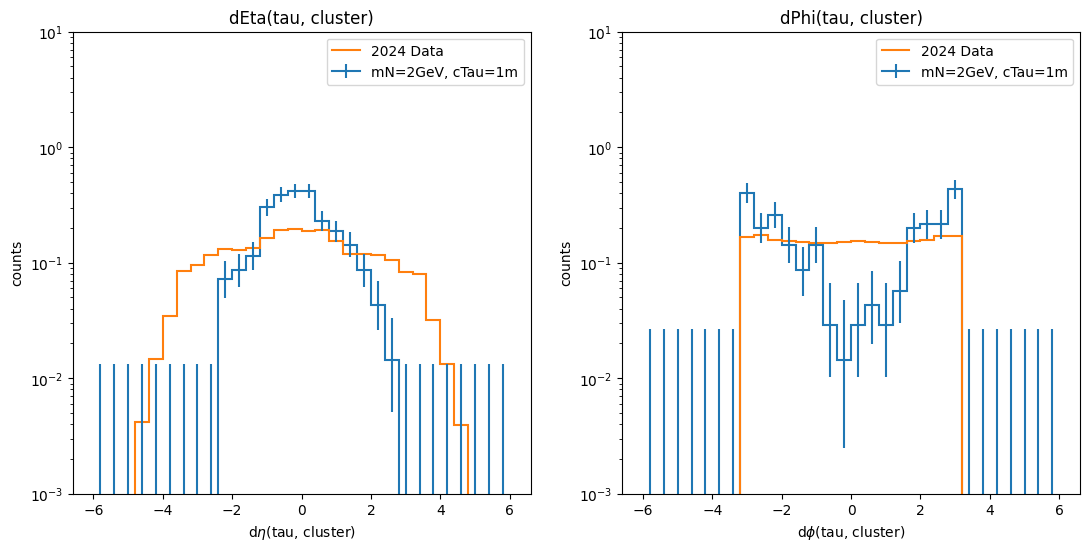

In [18]:
fig, axs = plt.subplots(1,2, figsize=(13,6))
signal_label = "mN=2GeV, cTau=1m"
data_label = "2024 Data"

#dEta
h_pT = output["tau_cluster_dEta"]
h_pT_data = output_data["tau_cluster_dEta"]
h_pT.plot(ax=axs[0], label=signal_label, density=True)
h_pT_data.plot(ax=axs[0], label=data_label, density=True)
axs[0].set_title(h_pT.metadata["title"])
axs[0].set_ylabel(h_pT.metadata["y_label"])
axs[0].legend()
axs[0].set_yscale('log')
axs[0].set_ylim(1e-3, 10)

#dPhi
h_eta = output["tau_cluster_dPhi"]
h_eta_data = output_data["tau_cluster_dPhi"]
h_eta.plot(ax=axs[1], label=signal_label, density=True)
h_eta_data.plot(ax=axs[1], label=data_label, density=True)
axs[1].set_title(h_eta.metadata["title"])
axs[1].set_ylabel(h_eta.metadata["y_label"])
axs[1].legend()
axs[1].set_yscale('log')
axs[1].set_ylim(1e-3, 10)


plt.show()